You are given the root of a binary tree and an integer distance. A pair of two different leaf nodes of a binary tree is said to be good if the length of the shortest path between them is less than or equal to distance.

Return the number of good leaf node pairs in the tree.

 

Example 1:

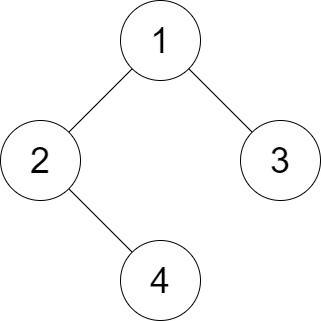

Input: root = [1,2,3,null,4], distance = 3
Output: 1
Explanation: The leaf nodes of the tree are 3 and 4 and the length of the shortest path between them is 3. This is the only good pair.

Example 2:

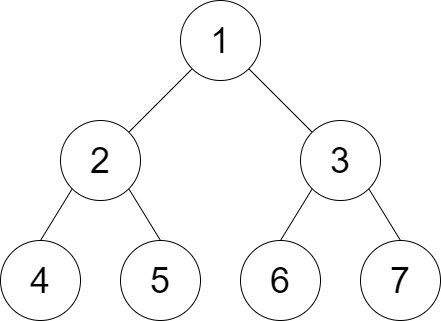

Input: root = [1,2,3,4,5,6,7], distance = 3
Output: 2
Explanation: The good pairs are [4,5] and [6,7] with shortest path = 2. The pair [4,6] is not good because the length of ther shortest path between them is 4.

Example 3:

Input: root = [7,1,4,6,null,5,3,null,null,null,null,null,2], distance = 3
Output: 1
Explanation: The only good pair is [2,5].

 

Constraints:

    The number of nodes in the tree is in the range [1, 210].
    1 <= Node.val <= 100
    1 <= distance <= 10



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def _post_order(self, currentNode, distance):
        if currentNode is None:
            return [0] * 12
        elif currentNode.left is None and currentNode.right is None:
            current = [0] * 12
            # Leaf node's distance from itself is 0
            current[0] = 1
            return current

        # Leaf node count for a given distance i
        left = self._post_order(currentNode.left, distance)
        right = self._post_order(currentNode.right, distance)

        current = [0] * 12

        # Combine the counts from the left and right subtree and shift by
        # +1 distance
        for i in range(10):
            current[i + 1] += left[i] + right[i]

        # Initialize to total number of good leaf nodes pairs from left and right subtrees.
        current[11] = left[11] + right[11]

        # Iterate through possible leaf node distance pairs
        for d1 in range(distance + 1):
            for d2 in range(distance + 1):
                if 2 + d1 + d2 <= distance:
                    # If the total path distance is less than the given distance limit,
                    # then add to he total number of good pairs
                    current[11] += left[d1] * right[d2]

        return current

    def countPairs(self, root: TreeNode, distance: int) -> int:
        return self._post_order(root, distance)[11]
